In [1]:
import os
import pandas as pd
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
avt_train = pd.read_csv('AV-Forecasting_Train.csv', index_col=1)
idx = pd.to_datetime(avt_train.index).to_period('H')
avt_train.index=idx
y_train = avt_train['Count']

AutoETS

In [3]:
forecaster = AutoETS(auto=True, sp=24, n_jobs=-1)
forecaster.fit(y_train)
print(forecaster.summary())

                                 ETS Results                                  
Dep. Variable:                  Count   No. Observations:                18288
Model:                       ETS(MAM)   Log Likelihood              -82915.149
Date:                Fri, 17 Nov 2023   AIC                         165890.297
Time:                        11:35:44   BIC                         166124.717
Sample:                    08-25-2012   HQIC                        165967.326
                         - 09-25-2014   Scale                            0.107
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.3354      0.004     75.730      0.000       0.327       0.344
smoothing_trend      3.354e-05   1.85e-05      1.809      0.070   -2.79e-06    6.99e-05
smoothing_season

In [4]:
avt_test = pd.read_csv('AV-Forecasting_Test.csv', index_col=1)
idx = pd.to_datetime(avt_test.index).to_period('H')
avt_test.index=idx

In [5]:
fh = ForecastingHorizon(avt_test.index, is_relative=False)

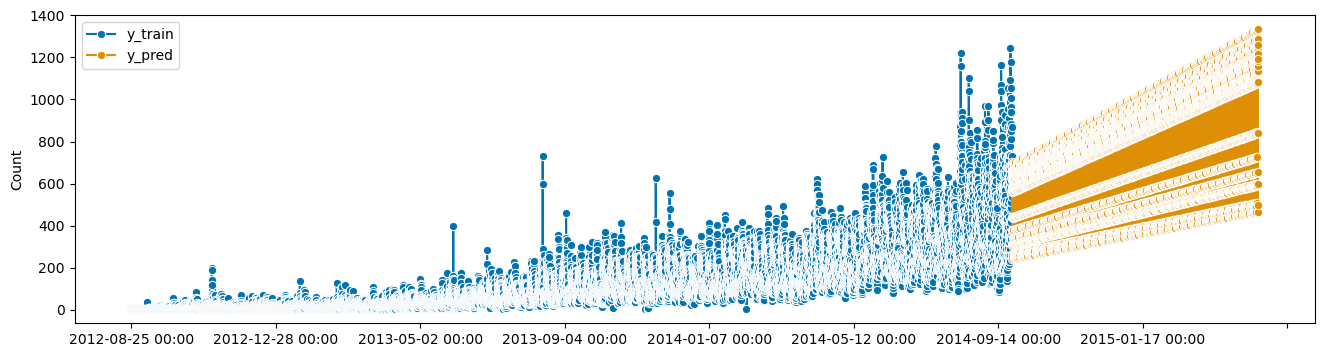

In [6]:
y_pred = forecaster.predict(fh)
plot_series(y_train, y_pred, labels=["y_train", "y_pred"])
plt.show()

In [7]:
import numpy as np


submit = pd.read_csv("AV-Forecasting_Test.csv", index_col=1)
submit['Count'] = np.around(y_pred.values)
submit.to_csv("autoETS.csv", index=False)

Auto ARIMA

In [8]:
from numpy import sqrt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

model = auto_arima(y_train, trace=True, suppress_warnings=True,seasonal=True, m=24)

forecast = model.predict(n_periods=len(avt_test))
forecast = pd.DataFrame(forecast,index = avt_test.index,
                        columns=['Prediction'])

#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(avt_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()


# plot results
plt.plot(avt_test)
plt.plot(forecast, color='red')
plt.show()

rms = sqrt(mean_squared_error(avt_test, forecast))
print('Test RMSE: %.3f' % rms)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=inf, Time=202.81 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=187752.233, Time=0.59 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=184707.797, Time=25.61 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=185844.866, Time=26.43 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=187750.242, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[24] intercept   : AIC=187738.425, Time=0.65 sec
 ARIMA(1,1,0)(2,0,0)[24] intercept   : AIC=183501.858, Time=105.85 sec


In [ ]:
submit = pd.read_csv("AV-Forecasting_Test.csv")
submit['Count'] = np.around(y_pred.values)
submit.to_csv("autoARIMA.csv", index=False)